In [1]:
import magen.solver as solver
from magen.models import chain
from magen.optimizer import BayesianOptimizer
# from bayes_opt import BayesianOptimization
import numpy as np
import matplotlib.pyplot as plt
from magen.aux_func import load_experiment_data

In [3]:
import ma

ModuleNotFoundError: No module named 'ma'

In [2]:
from magen import optimizer

In [3]:
experimental_files = {'T':'./Data/demo_data/T.csv',
                     'C':'./Data/demo_data/C.csv',
                     'Chiz':'./Data/demo_data/Chiz.csv',
                     'Chixy':'./Data/demo_data/Chixy.csv'}

exp_thermal_data = load_experiment_data(experimental_files)

In [4]:
mymodel = chain.XYZSpinChain(l=8)
interactions = mymodel.generate_interactions(Jx=1., Jz=1., Jy=1.)

In [5]:
mysolver = solver.EDSolver(size=mymodel.l, cal_chi_para=True)
# mysolver.get_hamiltonian_matrix(interactions)

In [6]:
thermal_data = mysolver.forward(interactions, 
                                T=exp_thermal_data.T, 
                                with_chi_para=True, 
                                mag_field={'hx':0., 'hz':0.})

In [ ]:
mag_field={'hx':0., 'hz':0.}
mag_field['hz']

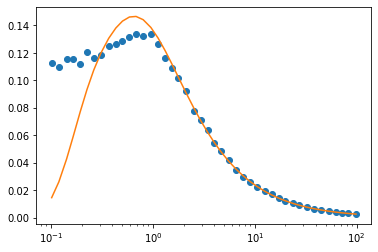

In [7]:
plt.semilogx(exp_thermal_data.T, exp_thermal_data.Chixy, 'o')
plt.semilogx(exp_thermal_data.T, thermal_data.Chixy.detach())

In [29]:
Opt = BayesianOptimizer(parameter_space={'Jx':(-10, 10), 'Jy':(-10, 10), 'Jz':(-10, 10)},
                        n_exp_total=300,
                        solver=mysolver,
                        model=mymodel,
                        T_cut=0,
                        exp_thermal_data=exp_thermal_data,
                        record_BO = True,
                        target_obs=['C', 'Chiz', 'Chixy'])

In [30]:
import magen

In [31]:
res = Opt.minimize(log_accelerate=False)

iteration 1: Loss = -0.05178345569373825, Parameter is {'Jx': 6.980820233590329, 'Jy': 6.5168202233855155, 'Jz': -4.641445105437791}
iteration 2: Loss = -0.14059409457844158, Parameter is {'Jx': -1.304504616806062, 'Jy': 0.07497307020780397, 'Jz': 0.863312137220575}
iteration 3: Loss = -0.11235844413876203, Parameter is {'Jx': 8.528539325017462, 'Jy': 5.549947978078089, 'Jz': 5.374715428409502}
iteration 4: Loss = -0.22757878992675012, Parameter is {'Jx': -6.222496545144429, 'Jy': 9.16000080871888, 'Jz': -2.3742653022644777}
iteration 5: Loss = -1.282366641213359, Parameter is {'Jx': -6.218533043096592, 'Jy': 5.286890567653504, 'Jz': 0.7455821143574504}
iteration 6: Loss = -0.730195846046794, Parameter is {'Jx': -4.026055619071456, 'Jy': 2.492676828963491, 'Jz': -5.440960777920374}
iteration 7: Loss = -1.0608602635511046, Parameter is {'Jx': 2.581516480749638, 'Jy': 7.395778781704234, 'Jz': -8.40967272411001}
iteration 8: Loss = -0.17311107452885435, Parameter is {'Jx': 9.5013974264106

iteration 67: Loss = -0.04421235581096025, Parameter is {'Jx': 5.724209388628623, 'Jy': -5.468341542222628, 'Jz': 3.487093007131987}
iteration 68: Loss = -0.05090927577661512, Parameter is {'Jx': 3.583970145940432, 'Jy': 4.507696522662211, 'Jz': 1.405118098067053}
iteration 69: Loss = -0.34094581738230706, Parameter is {'Jx': 10.0, 'Jy': 10.0, 'Jz': -10.0}
iteration 70: Loss = -0.0028914241853310128, Parameter is {'Jx': 2.016352660324454, 'Jy': 0.015406483179869923, 'Jz': 1.7882454140398618}
iteration 71: Loss = -0.01846654815499057, Parameter is {'Jx': 1.3893759626047402, 'Jy': 1.2004689083848685, 'Jz': -0.4438948130699494}
iteration 72: Loss = -0.1793731337765029, Parameter is {'Jx': 10.0, 'Jy': -10.0, 'Jz': -0.11056904055149022}
iteration 73: Loss = -0.03217249742813759, Parameter is {'Jx': 7.340697165612334, 'Jy': -6.326470618321163, 'Jz': 7.682780669870783}
iteration 74: Loss = -0.11730472292056957, Parameter is {'Jx': 6.1060496981002395, 'Jy': 7.735890338480259, 'Jz': 7.469439035

iteration 130: Loss = -0.012503503348714787, Parameter is {'Jx': 1.4419522399941958, 'Jy': 0.10326276504607712, 'Jz': 2.9406988396926685}
iteration 131: Loss = -0.10989077465675487, Parameter is {'Jx': -1.3449608027970967, 'Jy': 6.3012975261283515, 'Jz': -1.175519915269117}
iteration 132: Loss = -0.04555883700344778, Parameter is {'Jx': 3.919943428567656, 'Jy': 2.014425868155998, 'Jz': -1.6006757505362152}
iteration 133: Loss = -0.000727752008019439, Parameter is {'Jx': 1.516917894425431, 'Jy': -0.7981566814769625, 'Jz': 2.259538118587212}
iteration 134: Loss = -0.11320336190542624, Parameter is {'Jx': -2.5612569824230214, 'Jy': -9.19058254063279, 'Jz': -2.6350558114567013}
iteration 135: Loss = -0.22113722612647593, Parameter is {'Jx': 6.587055358757567, 'Jy': -9.959758112823867, 'Jz': -3.0388866587564394}
iteration 136: Loss = -0.09552839961677403, Parameter is {'Jx': -3.3080755334224987, 'Jy': -9.947928772894727, 'Jz': 4.646373562845644}
iteration 137: Loss = -0.01234596021592969, P

iteration 191: Loss = -8.759923845706773e-05, Parameter is {'Jx': 0.9417141834068801, 'Jy': 0.7725691561832306, 'Jz': 1.6141771507541431}
iteration 192: Loss = -0.0002132936556593526, Parameter is {'Jx': 0.7624005701500902, 'Jy': 1.383338968347946, 'Jz': 1.4316835438187052}
iteration 193: Loss = -0.05496727126322089, Parameter is {'Jx': 4.085081337599071, 'Jy': -3.7247662664517245, 'Jz': 6.624205805684401}
iteration 194: Loss = -0.015402228979330069, Parameter is {'Jx': 2.6673656012858586, 'Jy': -4.718549150278779, 'Jz': 3.686006135746867}
iteration 195: Loss = -0.000451430263819841, Parameter is {'Jx': 1.1868503256257235, 'Jy': -0.8667849172850204, 'Jz': 2.2050547125226565}
iteration 196: Loss = -0.015469396703542363, Parameter is {'Jx': 1.4353732644840598, 'Jy': -4.189893157086795, 'Jz': 3.9439926456029752}
iteration 197: Loss = -0.06623007625704756, Parameter is {'Jx': 8.922938506559891, 'Jy': -5.151903117562721, 'Jz': 7.394061878900164}
iteration 198: Loss = -0.036410906930015856, 

iteration 251: Loss = -0.0004168276962142753, Parameter is {'Jx': 1.3392254219617215, 'Jy': 0.8421221688366938, 'Jz': 1.3717144111096182}
iteration 252: Loss = -0.0007845930391046661, Parameter is {'Jx': 1.3291417477133258, 'Jy': -1.9282628001937052, 'Jz': 2.6646280455480387}
iteration 253: Loss = -0.0002485094555623766, Parameter is {'Jx': 1.3176111603580019, 'Jy': 0.3679976189369256, 'Jz': 1.6195329663167612}
iteration 254: Loss = -0.0001579079786254302, Parameter is {'Jx': 0.792356787843504, 'Jy': 1.1660985208582986, 'Jz': 1.487522780002088}
iteration 255: Loss = -0.004849079868808653, Parameter is {'Jx': 0.5349035800658068, 'Jy': 2.3043564113992883, 'Jz': 1.8994808559821426}
iteration 256: Loss = -0.702281897475769, Parameter is {'Jx': 9.882039909710116, 'Jy': 0.0412727529472221, 'Jz': -9.657163587263714}
iteration 257: Loss = -0.10021520881963733, Parameter is {'Jx': 8.427863884389794, 'Jy': 7.748958659566046, 'Jz': 1.4438502603283894}
iteration 258: Loss = -0.2990093860434379, Pa

In [8]:
import visualize
from importlib import reload  

In [9]:
visualize.plot_funcs_2d.show_landscape(res,
                             plan_keys=['Jx', 'Jz'],
                             itr=-1, log_scale=True)

NameError: name 'res' is not defined

In [13]:
from visualize import plot_funcs_3d

In [14]:
print('   o')
print('  / \  ...  |  | ')
print('-o - o- ... -o--o-')

   o
  / \  ...  |  | 
-o - o- ... -o--o-


In [15]:
class Animal:
    
    def __init__(self):
        pass
    
class Dog(Animal):
    
    def __init__(self):
        pass
    


In [16]:
mydog = Dog()
mycat = Animal()

In [17]:
isinstance(mydog, Dog)

True

In [18]:
isinstance(mycat, Dog)

False